<a href="https://colab.research.google.com/github/Snigdha-prime/Machine-learning-assignment/blob/main/Turboshaft_engine_fault_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Helicopter Turboshaft Fault Detection

This notebook demonstrates how to train and evaluate several supervised machine‑learning algorithms on a dataset of helicopter turboshaft engine sensor readings.  

The dataset contains hourly measurements from March 1, 2024 to December 31, 2024. Each sample records sensor readings (temperature, pressure, vibration, speed, fuel flow, altitude, airspeed, ambient temperature) and a fault label indicating the engine’s condition (e.g., *Normal*, *Compressor Degradation*, *Turbine Blade Damage*, *Sensor Malfunction*, *Fuel System Anomaly*, *Excessive Vibration Fault*).  

We will:

1. Load and inspect the dataset.
2. Preprocess the data (drop the timestamp, encode labels, split into training and testing sets).
3. Train three classifiers (logistic regression, decision tree, random forest).
4. Evaluate each model using accuracy, classification reports and confusion matrices.
5. Discuss how class imbalance affects performance and how to mitigate it.



In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset (make sure the CSV file is in your Colab session or Google Drive)
file_path = '/content/drive/My Drive/ML/Helicopter_Turboshaft_Fault_Detection.csv'
  # update if you upload to a different path
df = pd.read_csv(file_path)

# Preview the first few rows
pd.set_option('display.max_columns', None)
df.head()


,Timestamp,Temp_Compressor,Temp_Turbine,Pressure_Compressor,Vibration_Compressor,Speed_Turbine,Fuel_Flow,Altitude,Airspeed,Ambient_Temp,Fault_Label
0,3/1/2024 0:00,0.516699,-0.482741,1.218923,0.439431,1.109674,0.259894,-0.457097,0.935177,0.520473,Normal
1,3/1/2024 1:00,-0.137372,-1.071038,-0.581229,0.165394,-0.344521,0.381376,1.416960,-0.804455,-0.461119,Normal
2,3/1/2024 2:00,0.672213,-0.867799,0.268908,1.551952,1.156725,0.647181,0.053060,-1.435661,-1.606553,Normal
3,3/1/2024 3:00,1.573874,-1.351055,0.142967,0.176228,0.047683,-1.703167,-1.739264,-0.980834,0.247414,Normal
4,3/1/2024 4:00,-0.236144,-0.949079,-1.116520,0.251032,0.122548,-0.376294,0.681555,0.341163,-1.328883,Turbine Blade Damage


In [14]:
# Dimensions of the dataset
print(f"Dataset shape: {df.shape}")

# Display column names
df.columns

Dataset shape: (7012, 11)


Index(['Timestamp', 'Temp_Compressor', 'Temp_Turbine', 'Pressure_Compressor',
       'Vibration_Compressor', 'Speed_Turbine', 'Fuel_Flow', 'Altitude',
       'Airspeed', 'Ambient_Temp', 'Fault_Label'],
      dtype='object')

In [15]:
# Check for missing values
missing = df.isnull().sum()
missing

,0
Timestamp,0
Temp_Compressor,0
Temp_Turbine,0
Pressure_Compressor,0
Vibration_Compressor,0
Speed_Turbine,0
Fuel_Flow,0
Altitude,0
Airspeed,0
Ambient_Temp,0


Fault_Label
Normal                       5157
Compressor Degradation        584
Turbine Blade Damage          444
Sensor Malfunction            394
Fuel System Anomaly           218
Excessive Vibration Fault     215
Name: count, dtype: int64


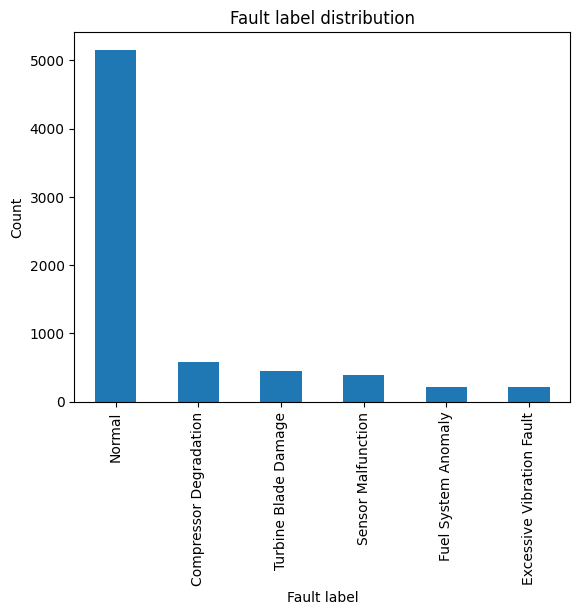

In [16]:
# Distribution of fault labels
label_counts = df['Fault_Label'].value_counts()
print(label_counts)

# Plot class distribution
plt.figure()
label_counts.plot(kind='bar', title='Fault label distribution')
plt.xlabel('Fault label')
plt.ylabel('Count')
plt.show()

In [17]:
# Drop the timestamp column (it is a string; not useful as a numerical feature)
X = df.drop(columns=['Timestamp', 'Fault_Label'])
y = df['Fault_Label']

# Encode the fault labels as integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


Training samples: 5609
Testing samples: 1403


**1. Scale features then Logistic Regression Classifier**

Logistic Regression accuracy: 0.7356
Classification report (Logistic Regression):
                           precision    recall  f1-score   support

   Compressor Degradation       0.00      0.00      0.00       117
Excessive Vibration Fault       0.00      0.00      0.00        43
      Fuel System Anomaly       0.00      0.00      0.00        43
                   Normal       0.74      1.00      0.85      1032
       Sensor Malfunction       0.00      0.00      0.00        79
     Turbine Blade Damage       0.00      0.00      0.00        89

                 accuracy                           0.74      1403
                macro avg       0.12      0.17      0.14      1403
             weighted avg       0.54      0.74      0.62      1403

Confusion matrix: [[   0    0    0  117    0    0]
 [   0    0    0   43    0    0]
 [   0    0    0   43    0    0]
 [   0    0    0 1032    0    0]
 [   0    0    0   79    0    0]
 [   0    0    0   89    0    0]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


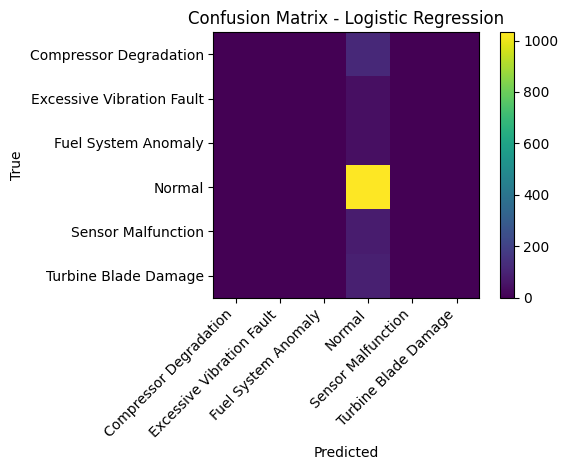

In [18]:
# Pipeline: scale features then logistic regression classifier
log_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000, multi_class='auto'))
])

# Train
aaa = log_reg_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = log_reg_pipeline.predict(X_test)

# Evaluate accuracy
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression accuracy: {acc_lr:.4f}")

# Classification report
print("Classification report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr, target_names=le.classes_, zero_division=0))

# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion matrix:", cm_lr)

# Plot confusion matrix
plt.figure()
plt.imshow(cm_lr)
plt.title('Confusion Matrix - Logistic Regression')
plt.xticks(ticks=np.arange(len(le.classes_)), labels=le.classes_, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(le.classes_)), labels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.colorbar()
plt.tight_layout()
plt.show()

**2. Train decision tree classifier**

Decision Tree accuracy: 0.5296
Classification report (Decision Tree):
                           precision    recall  f1-score   support

   Compressor Degradation       0.06      0.07      0.07       117
Excessive Vibration Fault       0.00      0.00      0.00        43
      Fuel System Anomaly       0.05      0.05      0.05        43
                   Normal       0.73      0.70      0.71      1032
       Sensor Malfunction       0.03      0.04      0.04        79
     Turbine Blade Damage       0.10      0.12      0.11        89

                 accuracy                           0.53      1403
                macro avg       0.16      0.16      0.16      1403
             weighted avg       0.55      0.53      0.54      1403

Confusion matrix: [[  8   3   2  89   5  10]
 [  3   0   0  31   6   3]
 [  4   2   2  31   3   1]
 [104  35  33 719  62  79]
 [  1   3   4  59   3   9]
 [  8   3   2  52  13  11]]


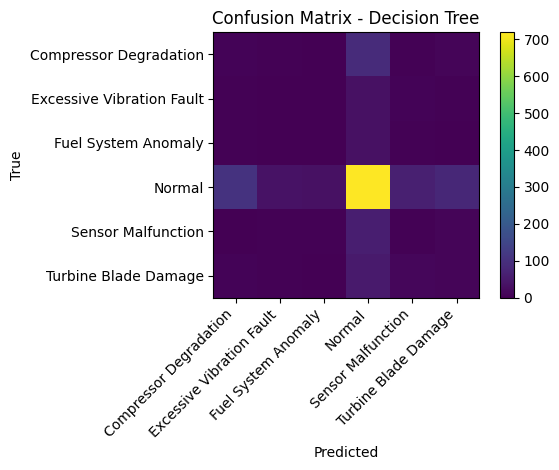

In [19]:
# Train decision tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree accuracy: {acc_dt:.4f}")

print("Classification report (Decision Tree):")
print(classification_report(y_test, y_pred_dt, target_names=le.classes_, zero_division=0))

cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion matrix:", cm_dt)

plt.figure()
plt.imshow(cm_dt)
plt.title('Confusion Matrix - Decision Tree')
plt.xticks(ticks=np.arange(len(le.classes_)), labels=le.classes_, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(le.classes_)), labels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.colorbar()
plt.tight_layout()
plt.show()

**3.Train Random Forest Classifier (with 200 trees)**

Random Forest accuracy: 0.7356
Classification report (Random Forest):
                           precision    recall  f1-score   support

   Compressor Degradation       0.00      0.00      0.00       117
Excessive Vibration Fault       0.00      0.00      0.00        43
      Fuel System Anomaly       0.00      0.00      0.00        43
                   Normal       0.74      1.00      0.85      1032
       Sensor Malfunction       0.00      0.00      0.00        79
     Turbine Blade Damage       0.00      0.00      0.00        89

                 accuracy                           0.74      1403
                macro avg       0.12      0.17      0.14      1403
             weighted avg       0.54      0.74      0.62      1403

Confusion matrix: [[   0    0    0  117    0    0]
 [   0    0    0   43    0    0]
 [   0    0    0   43    0    0]
 [   0    0    0 1032    0    0]
 [   0    0    0   79    0    0]
 [   0    0    0   89    0    0]]


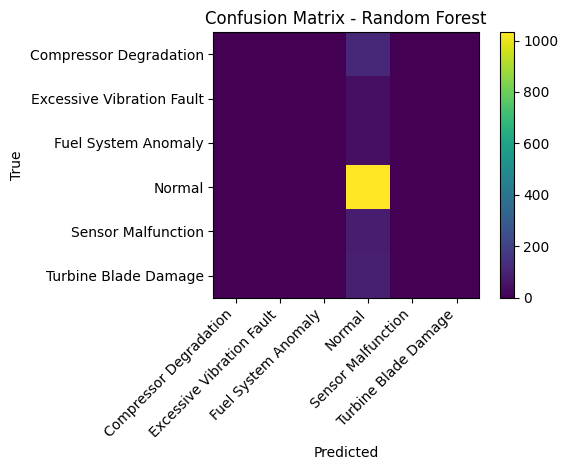

In [20]:
# Train random forest classifier (with 200 trees)
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest accuracy: {acc_rf:.4f}")

print("Classification report (Random Forest):")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_, zero_division=0))

cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion matrix:", cm_rf)

plt.figure()
plt.imshow(cm_rf)
plt.title('Confusion Matrix - Random Forest')
plt.xticks(ticks=np.arange(len(le.classes_)), labels=le.classes_, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(le.classes_)), labels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.colorbar()
plt.tight_layout()
plt.show()

**4. XGBoost Classifier Training and Evaluation for Fault Detection**

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:16:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost accuracy: 0.7320
Classification report (XGBoost):
                           precision    recall  f1-score   support

   Compressor Degradation       0.00      0.00      0.00       117
Excessive Vibration Fault       0.00      0.00      0.00        43
      Fuel System Anomaly       0.00      0.00      0.00        43
                   Normal       0.74      0.99      0.85      1032
       Sensor Malfunction       0.20      0.01      0.02        79
     Turbine Blade Damage       0.00      0.00      0.00        89

                 accuracy                           0.73      1403
                macro avg       0.16      0.17      0.14      1403
             weighted avg       0.55      0.73      0.62      1403

Confusion matrix: [[   0    0    0  115    1    1]
 [   0    0    0   43    0    0]
 [   0    0    0   42    1    0]
 [   1    1    0 1026    2    2]
 [   0    0    0   78    1    0]
 [   0    0    0   89    0    0]]


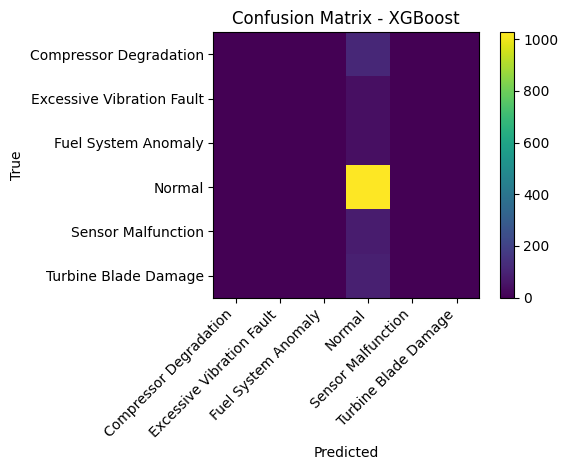

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = '/content/drive/My Drive/ML/Helicopter_Turboshaft_Fault_Detection.csv'
df = pd.read_csv(file_path)

# Drop the Timestamp column (it is a string; not useful as a numerical feature)
X = df.drop(columns=['Timestamp', 'Fault_Label'])

# Ensure all columns are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Encode the fault labels as integers
y = df['Fault_Label']
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Train XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost accuracy: {acc_xgb:.4f}")

print("Classification report (XGBoost):")
print(classification_report(y_test, y_pred_xgb, target_names=le.classes_, zero_division=0))

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion matrix:", cm_xgb)

plt.figure()
plt.imshow(cm_xgb)
plt.title('Confusion Matrix - XGBoost')
plt.xticks(ticks=np.arange(len(le.classes_)), labels=le.classes_, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(le.classes_)), labels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.colorbar()
plt.tight_layout()
plt.show()


## 5. Compare Model Performance

/tmp/ipython-input-577682758.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


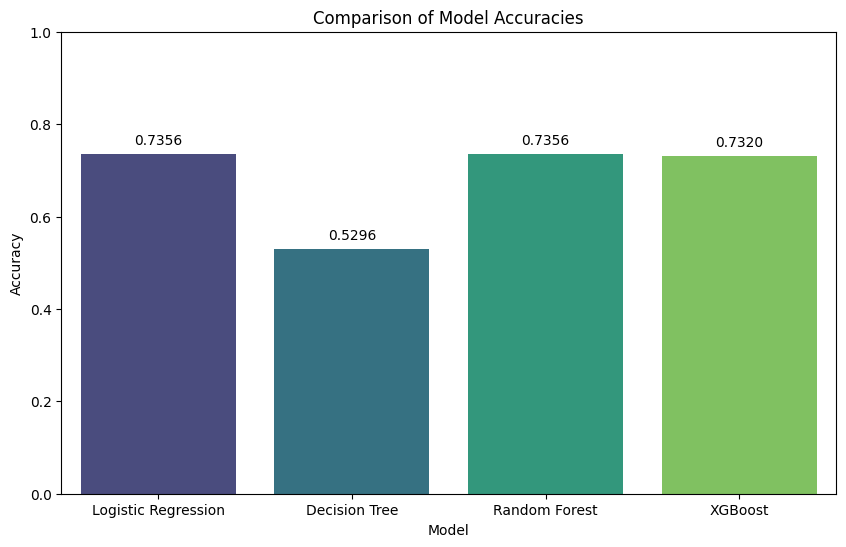

In [25]:
import seaborn as sns

model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
accuracies = [acc_lr, acc_dt, acc_rf, acc_xgb]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1) # Accuracy is between 0 and 1

for index, value in enumerate(accuracies):
    plt.text(index, value + 0.02, f'{value:.4f}', ha='center')

plt.show()

### Handling class imbalance

As the class distribution plot shows, the **Normal** class heavily dominates the dataset.  
This imbalance causes models such as logistic regression and random forest to predict the majority class almost exclusively, leading to high overall accuracy but very poor recall for minority classes.  

To address class imbalance you can try:

- **Weighted models** – many scikit‑learn classifiers accept a `class_weight` parameter. For example, `RandomForestClassifier(class_weight='balanced')` assigns weights inversely proportional to class frequencies.
- **Resampling** – techniques like **SMOTE** (Synthetic Minority Over‑sampling Technique) create synthetic samples of minority classes. This requires the `imbalanced‑learn` library.
- **Evaluation metrics** – use metrics like precision, recall and F1‑score for each class instead of accuracy alone.

You can experiment with these techniques to improve performance on minority classes.  


ChatGPT said:XGBoost (Extreme Gradient Boosting) is a powerful machine learning algorithm that is based on gradient boosting. It is specifically designed for supervised learning tasks, such as regression and classification. Here’s a breakdown of how it works and why it's widely used:

**1. Gradient Boosting Overview:**


Boosting is an ensemble technique where multiple weak learners (typically decision trees) are combined to form a strong learner. The key idea is to train each new model (tree) to correct the errors made by the previous ones.


Gradient Boosting improves the performance of boosting by focusing on minimizing the loss function (the difference between the predicted values and the actual target values). This is done by adjusting the weights of the training samples and applying a gradient descent-like approach to minimize the residual error in a sequential manner.

**2. How XGBoost Works:**

Model Building: XGBoost builds decision trees sequentially. Each new tree tries to correct the errors (or residuals) made by the previous trees. Unlike random forests (where trees are built independently), XGBoost builds trees in a way that each tree focuses on the mistakes made by the previous ones.

Regularization: XGBoost introduces a regularization term into the cost function (which is the loss function), making it less prone to overfitting, compared to traditional gradient boosting methods.

Gradient Descent: In each iteration, XGBoost calculates the gradient of the loss function, and then it uses this gradient to adjust the weights of the model to make better predictions in the next iteration.

Optimized Tree Building: XGBoost employs a more efficient way of building trees through approximate tree learning and split finding techniques, which helps reduce computation time.

**3. Advantages of XGBoost:**

High Performance: XGBoost is known for its speed and accuracy. It is highly optimized for parallel computation, which makes it much faster than traditional gradient boosting.

Regularization: XGBoost provides built-in support for L1 (Lasso) and L2 (Ridge) regularization, which helps prevent overfitting.

Handles Missing Data: It can handle missing data by learning how to treat missing values during the training process.

Flexible: It can be used for both classification (e.g., fault detection) and regression tasks (e.g., predicting values).

Feature Importance: XGBoost allows you to easily assess the importance of features, which can be valuable for feature selection